Arvin Jalali <br>
2310744 <br>
02, 04, 2024  <br>

# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2024

### Prediction of the metal ion content from multi-parameter data
<b> Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), using number of neighbors k = 1, 3, 5, 7.</b> <br>

<b> Instructions: </b> 

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html
    - The data should be standarized using z-score (using sklearn.preprocessing.StandardScaler is advised).
    - Implement Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Explain your code by adding detailed comments. 
    - Only provide code that is relevant to the exercise.
    - Please submit your solution as a Jupyter Notebook (.ipynb) and as a PDF file. Ensure to include your full name in the filename.     
    - Submit to moodle your solution on ** Wednesday 7 of February ** at the latest.
  
<b>Please follow the instructions and note that you are expected to submit your individual solution.<br>
Identical or overly similar submissions will result in the exercise being marked as failed.
</b>

## Import libraries

In [75]:
# In this cell import all libraries you need. For example: 

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

## Read and visualize the dataset

In [76]:
# In this cell read the file Water_data.csv
file_path = 'water_data.csv'
df = pd.read_csv(file_path)

# Print the dataset dimesions (i.e. number of rows and columns)
print()
print("Dataset dimensions (rows, columns):", df.shape)

# Print the first 5 rows of the dataset
print()
print("The first 5 rows of the dataset:")
print(df.head())


Dataset dimensions (rows, columns): (268, 6)

The first 5 rows of the dataset:
    Mod1  Mod2    Mod3  c_total   Cd    Pb
0   9945   119   72335        0  0.0   0.0
1   9596   119  110542        0  0.0   0.0
2  10812   120   98594        0  0.0   0.0
3  10786   117   82977        0  0.0   0.0
4  10566   108  136416       14  0.0  14.0


## Standardization of the dataset

In [77]:
# In this cell, standardize the dataset features by removing the mean and scaling to unit variance. 
# In other words, use z-score to scale the dataset features (Mod1, Mod2, Mod3) 
# Print the 5 first samples (i.e. rows) of the scaled dataset

columns_to_standardize = ['Mod1', 'Mod2', 'Mod3']
df_selected = df[columns_to_standardize]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_selected), columns=columns_to_standardize)
df[columns_to_standardize] = df_standardized
print()
print("The first 5 rows of the dataset:")
print(df.head())


The first 5 rows of the dataset:
       Mod1      Mod2      Mod3  c_total   Cd    Pb
0 -0.972283 -0.670482 -0.358179        0  0.0   0.0
1 -0.975878 -0.670482  0.259488        0  0.0   0.0
2 -0.963351 -0.670394  0.066333        0  0.0   0.0
3 -0.963619 -0.670657 -0.186137        0  0.0   0.0
4 -0.965885 -0.671447  0.677776       14  0.0  14.0


## C-index code 

In [78]:
# In this cell, implement the C-index function. You may use the implementation from the first exercise.

def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n

In [79]:
# Test the cindex function with following values

true_labels = np.array([-1, 1, 1, -1, 1])
pred_labels = np.array([0.60, 0.80, 0.75, 0.75, 0.70])
cindx = cindex(true_labels, pred_labels)
print(cindx) #For this example, a correct C-index implementation will result in 0.75

0.75


## Leave-One-Out cross-validation
In the following cell, write and execute your code for Leave-One-Out cross-validation using K-Nearest Neighbor Regression with k values of 1, 3, 5, and 7.<br>
Print the corresponding Leave-One-Out C-index for c_total, Cd and Pb for each k value.

In [80]:
features = ['Mod1', 'Mod2', 'Mod3']
targets = ['c_total', 'Cd', 'Pb']
k_values = [1, 3, 5, 7]

# initializing the KNN for all the values of k the
knn_models = {k: KNeighborsRegressor(n_neighbors=k) for k in k_values}

# to store predicted values for each combination of k and target variable
predicted_values = {target: {k: [] for k in k_values} for target in targets}

# Performing LOO C-V
for k in k_values:
    for i in range(len(df)):
        
        # determining the training and test data for LOO C-V based on the definition
        train_data = df.drop(index=i)
        test_data = df.loc[[i]]
        # considering features and targets based on the problem
        X_train, y_train = train_data[features], train_data[targets]
        X_test, y_test = test_data[features], test_data[targets]
        # fitting KNN algorithm
        knn_models[k].fit(X_train, y_train)
        # predicting the target values
        y_pred = knn_models[k].predict(X_test)

        # storing the predicted values of each target
        for j, target in enumerate(targets):
            predicted_values[target][k].append(y_pred[0][j])

# calculating C_index after completing the cross validation and outside the loop 
for target in targets:
    print(f"\nLeave-One-Out Cross-Validation c-index for {target}:")
    for k in k_values:
        c_index = cindex(df[target].values, predicted_values[target][k])
        print(f"  K={k}: {c_index}")



Leave-One-Out Cross-Validation c-index for c_total:
  K=1: 0.9080981182795699
  K=3: 0.9203629032258065
  K=5: 0.8961846285434996
  K=7: 0.8839045698924731

Leave-One-Out Cross-Validation c-index for Cd:
  K=1: 0.9135916902071564
  K=3: 0.912488229755179
  K=5: 0.8663488700564972
  K=7: 0.8315972222222222

Leave-One-Out Cross-Validation c-index for Pb:
  K=1: 0.879590395480226
  K=3: 0.8847104519774012
  K=5: 0.8609345574387948
  K=7: 0.8410428436911488


## Leave-Replicas-Out cross-validation

In the following cell, write and execute your code for Leave-Replicas-Out cross-validation using K-Nearest Neighbor Regression with k values of 1, 3, 5, and 7.<br>
Print the corresponding Leave-Replicas-Out C-index for c_total, Cd and Pb for each k value.

In [81]:
# splitting the DataFrame into groups of 4 consecutive data points
num_groups = len(df) // 4
groups = [df.iloc[i:i+4] for i in range(0, len(df), 4)]

# values of k for KNN
k_values = [1, 3, 5, 7]

# lists in order to store predicted values for each target and each value of k
predicted_values = {'c_total': {k: [] for k in k_values},'Cd': {k: [] for k in k_values},
                    'Pb': {k: [] for k in k_values}}

# perfroming LRO C-V
for k in k_values:
    for i in range(num_groups):
        # defining the test data and corresponding targets
        test_data = groups[i].drop(['c_total', 'Cd', 'Pb'], axis=1)
        true_c_total = groups[i]['c_total']
        true_Cd = groups[i]['Cd']
        true_Pb = groups[i]['Pb']

        # retermining the training data
        train_data = pd.concat([group for j, group in enumerate(groups) if j != i]).drop(['c_total', 'Cd', 'Pb'], axis=1)
        train_c_total = pd.concat([group['c_total'] for j, group in enumerate(groups) if j != i])
        train_Cd = pd.concat([group['Cd'] for j, group in enumerate(groups) if j != i])
        train_Pb = pd.concat([group['Pb'] for j, group in enumerate(groups) if j != i])

        # initializing KNN 
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        # fitting KNN for c_total
        knn_reg.fit(train_data, train_c_total)
        predicted_values['c_total'][k].extend(knn_reg.predict(test_data))
        # for Cd
        knn_reg.fit(train_data, train_Cd)
        predicted_values['Cd'][k].extend(knn_reg.predict(test_data))
        #  for Pb
        knn_reg.fit(train_data, train_Pb)
        predicted_values['Pb'][k].extend(knn_reg.predict(test_data))

# performance evaluation using cindex() function for each combination of target variable and k value
for target in ['c_total', 'Cd', 'Pb']:
    print("c-index for", target)
    for k in k_values:
        c_idx = cindex(df[target], predicted_values[target][k])
        print(f"(k={k}):", c_idx)
        

c-index for c_total
(k=1): 0.8238483626588465
(k=3): 0.8231152248289345
(k=5): 0.8160740469208211
(k=7): 0.8196939149560117
c-index for Cd
(k=1): 0.7525453154425612
(k=3): 0.753545786252354
(k=5): 0.733330390772128
(k=7): 0.7424523305084746
c-index for Pb
(k=1): 0.7360081214689266
(k=3): 0.7628589924670434
(k=5): 0.7481314736346516
(k=7): 0.7499411487758946


## Plot Leave-One-Out and Leave-Replicas-Out Results

Note: You may plot the results as they were presented in the video lecture (refer to MOOC2-Module 2 .pptx slides).

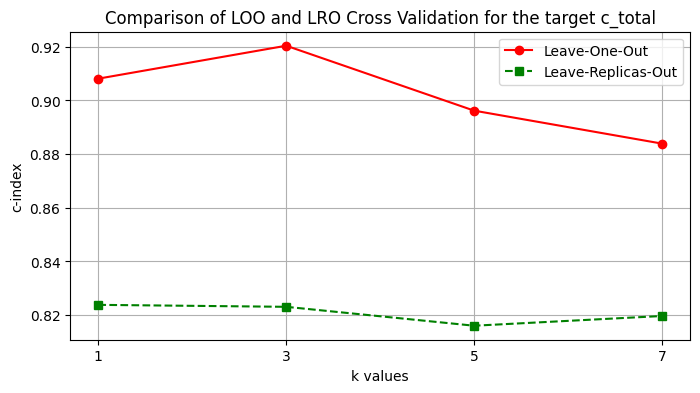

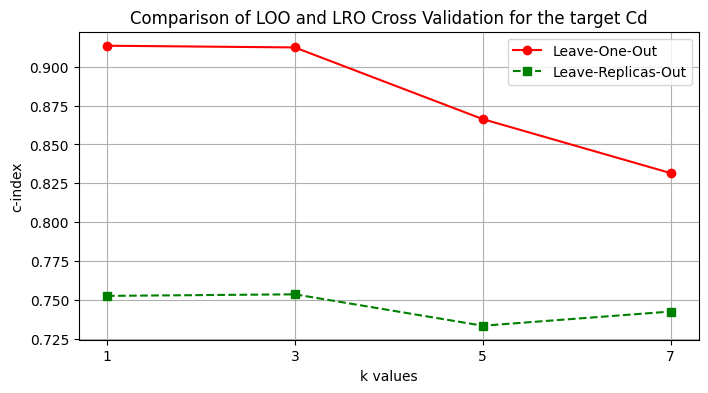

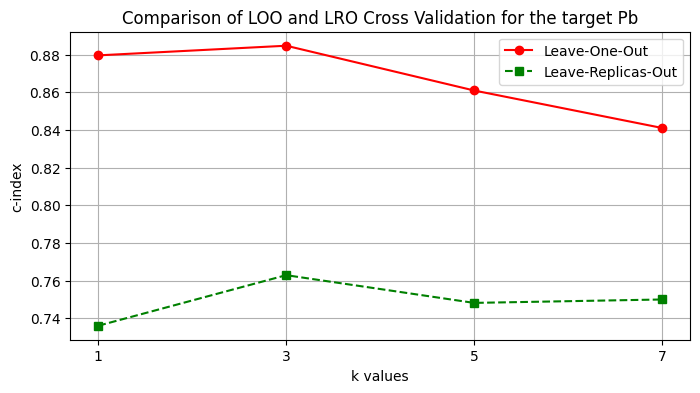

In [82]:
def plot_results(target):
    plt.figure(figsize=(8, 4))
    # in order to plot for LOO C-V c-index values
    plt.plot(k_values, loo_results[target]['c_index_values'], marker='o', linestyle='-',
             label='Leave-One-Out', color='r')
    # in order to plot for LRO C-V c-index values
    plt.plot(k_values, lro_results[target]['c_index_values'], marker='s', linestyle='--',
             label='Leave-Replicas-Out', color='g')

    plt.xlabel('k values')
    plt.ylabel('c-index') 
    plt.title(f'Comparison of LOO and LRO Cross Validation for the target {target}' )
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

for target in targets:
    plot_results(target)

## Interpretation of results
#### Answer the following questions based on the results obtained
- Which cross-validation method had more optimistic results? 
- Explain the reason for the optimistic results produced by the cross-validation method.
- Which cross-validation method generalized better on unseen data? Why?

#In this cell write your answers to the questions.

Here, based on the results the Leave One Out Cross Validation has a higher values for C_index compared to Leave Replicas Out Cross Validation. Leave One Out is more optimistic because it can predicts the values through the available replicates in the training data which leads to non-realistic and optimistic results. That is why in this case, considering that data is not-independent, Leave Replicas Out works much better and more realistic that Leave One Out. In Leave Replicas Out, instead of considering a datapoint as a test data, each time a collection of all replicates will be considered as a test data in order to avoid data leakage and optimistic evaluation because of the existance of replicates in the training data. Considering that the data is non-independent in this case study which means that data points are dependent, the Leave Replicas Out Cross Validation genelizes better and more realistic on unseen data compared to Leave One Out.